# Imports and libraries

In [1]:
import pandas as pd
import numpy as np
import json 

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Exploratory data analysis
First read the .csv file in pandas format.

In [2]:
df = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df.head()

Unnamed: 0  gender  parental level of education         lunch  \
0         764  female                            1      standard   
1         866    male                            4      standard   
2         208  female                            2      standard   
3         337  female                            0  free/reduced   
4         323    male                            3      standard   

  test preparation course  math score  reading score  writing score  
0                    none          62             76             67  
1                    none          79             57             58  
2                    none          77             86             84  
3                    none          45             46             49  
4               completed          82             83             85

Pandas profiling create the EDA.

In [3]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The target is the parental level of education.
The only interested variable is the mean score. I use the mean beacuse all the scores are very correlated.
I standarize the data

In [4]:
y_train = np.reshape(df[["parental level of education"]].to_numpy(), 800)
x_train = (df["math score"] + df["reading score"] + df["writing score"]).to_frame()
x_test = (df_test["math score"] + df_test["reading score"] + df_test["writing score"]).to_frame()
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_train[:4]

array([[ 0.03312504],
       [-0.21687524],
       [ 0.98767155],
       [-1.44414933]])

# Models
I use several classifiers using the cross validation model to found the best classifier.

##### Neural Network

In [5]:
nn = MLPClassifier(random_state=1, max_iter=500)
cv_results_nn = cross_validate(nn, x_train, y_train, cv=5)
cv_results_nn["test_score"].mean()

0.2225

##### SVM

In [6]:
svm = SVC(kernel='rbf', random_state = 0)
cv_results_svm = cross_validate(svm, x_train, y_train, cv=5)
cv_results_svm["test_score"].mean()

0.24375

##### Random Forest

In [7]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
cv_results_rf = cross_validate(rf, x_train, y_train, cv=5)
cv_results_rf["test_score"].mean()

0.22625

##### Naives Bayes

In [8]:
gnb = GaussianNB()
cv_results_gnb = cross_validate(gnb, x_train, y_train, cv=5)
cv_results_gnb["test_score"].mean()

0.23125

# Results
##### Confusion matrix

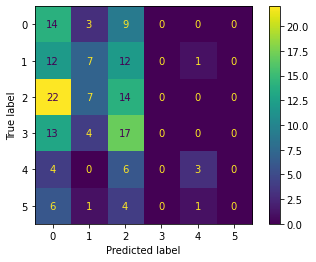

In [9]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

model = SVC(kernel='rbf', random_state = 123, probability=True)
cv_results_svm = model.fit(x_train_s, y_train_s)
y_pred_s = model.predict(x_test_s)
cm = confusion_matrix(y_test_s, y_pred_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

##### F1-Score

In [10]:
f1_score(y_test_s, y_pred_s, average='macro')

0.19131984217894868

# Output

In [11]:
model = SVC(kernel='rbf', random_state = 0)
cv_results_svm = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 2, 4, 2, 2, 0, 4, 4, 0, 2, 0, 2, 0, 0, 1, 2, 0, 4, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 4, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 4, 0, 0, 0, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0,
       0, 2, 0, 2, 4, 0, 2, 0, 0, 0, 2, 2, 2, 4, 0, 4, 2, 2, 2, 1, 0, 0,
       0, 2])

In [12]:
output = dict()
output["target"] = dict()

for n, index in enumerate(df_test['Unnamed: 0']):
    output['target'][str(index)] = int(y_pred[n])
    
print(output)

{'target': {'79': 1, '277': 2, '855': 4, '922': 2, '332': 2, '703': 0, '754': 4, '273': 4, '804': 0, '267': 2, '882': 0, '599': 2, '305': 0, '271': 0, '978': 1, '507': 2, '676': 0, '396': 4, '611': 2, '258': 2, '915': 0, '597': 2, '583': 2, '257': 0, '933': 0, '562': 0, '328': 0, '727': 0, '174': 2, '779': 1, '263': 0, '474': 0, '280': 2, '347': 2, '679': 0, '832': 2, '895': 2, '616': 2, '775': 2, '571': 2, '262': 2, '23': 2, '372': 0, '364': 0, '877': 0, '925': 0, '487': 0, '861': 2, '188': 0, '147': 2, '304': 0, '639': 0, '335': 2, '428': 2, '152': 2, '673': 0, '510': 2, '992': 0, '310': 0, '312': 1, '848': 2, '943': 2, '296': 1, '219': 0, '687': 2, '203': 0, '910': 0, '243': 0, '46': 0, '505': 2, '920': 2, '21': 2, '926': 0, '75': 2, '307': 0, '859': 2, '176': 2, '320': 2, '12': 2, '870': 2, '297': 2, '371': 2, '625': 2, '719': 1, '879': 2, '122': 2, '217': 2, '781': 2, '439': 0, '522': 2, '889': 2, '163': 2, '260': 0, '168': 2, '763': 2, '809': 2, '653': 1, '249': 2, '725': 1, '165

In [13]:
with open("predictions.json", "w") as write_file:
    json.dump(output, write_file, indent= 2)